In [1]:
pip install scikit-fuzzy

     -------------------------------------- 994.0/994.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=38f7b65541f174f10606376f63c720109682478db0f8b8e83b682aaefa4c7dc5
  Stored in directory: c:\users\skill\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [17]:
#input
glycaemia    = ctrl.Antecedent(np.arange(70, 151, 1), 'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0, 21, 1), 'cyclosporine')
#ouput
gfr         = ctrl.Consequent(np.arange(15, 130, 1), 'gfr')

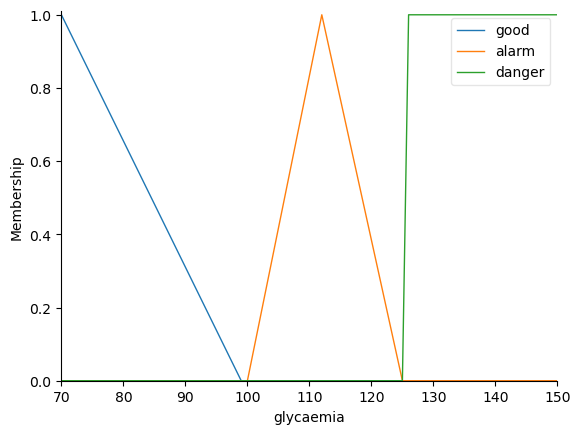

In [18]:
glycaemia['good']  = fuzz.trimf(glycaemia.universe, [70, 70, 99])
glycaemia['alarm']  = fuzz.trimf(glycaemia.universe, [100, 112, 125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe, [126, 126, 150, 150])
glycaemia.view()

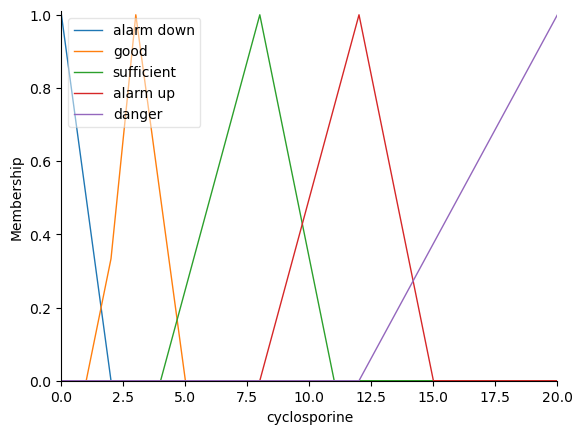

In [19]:
cyclosporine['alarm down'] = fuzz.trimf(cyclosporine.universe, [0, 0, 2])
cyclosporine['good']       = fuzz.trimf(cyclosporine.universe, [1.5, 3, 5])
cyclosporine['sufficient'] = fuzz.trimf(cyclosporine.universe, [4, 8, 11])
cyclosporine['alarm up']   = fuzz.trimf(cyclosporine.universe, [8, 12, 15])
cyclosporine['danger']     = fuzz.trimf(cyclosporine.universe, [12, 20, 20])
cyclosporine.view()

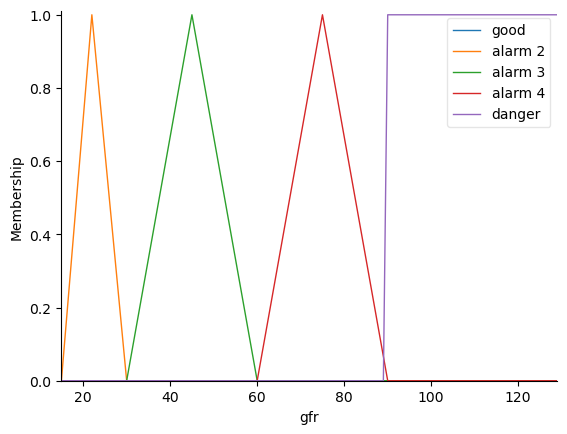

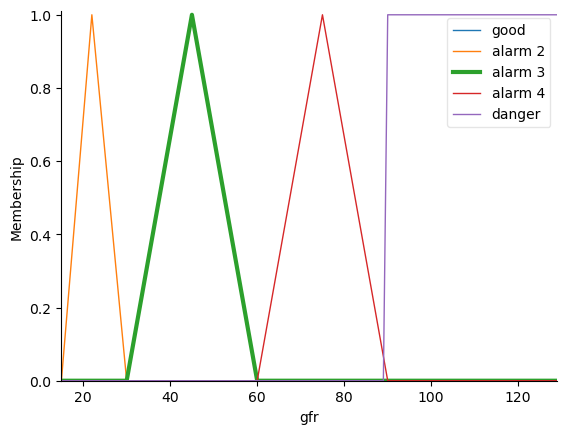

In [21]:
gfr['good']    = fuzz.trimf(gfr.universe, [0, 0, 15])
gfr['alarm 2'] = fuzz.trimf(gfr.universe, [15, 22, 30])
gfr['alarm 3'] = fuzz.trimf(gfr.universe, [30, 45, 60])
gfr['alarm 4'] = fuzz.trimf(gfr.universe, [60, 75, 90])
gfr['danger']  = fuzz.trapmf(gfr.universe, [90, 90, 130, 130])
gfr.view()
gfr['alarm 3'].view()

In [23]:
rule1 = ctrl.Rule(glycaemia['danger']&cyclosporine['danger'],gfr['danger'])
rule2 = ctrl.Rule(glycaemia['good']&cyclosporine['danger'],gfr['alarm 3'])
rule3 = ctrl.Rule(glycaemia['alarm']&cyclosporine['alarm up'],gfr['alarm 4'])
rule4 = ctrl.Rule(glycaemia['good']&cyclosporine['sufficient'],gfr['alarm 2'])
rule5 = ctrl.Rule(glycaemia['good']&cyclosporine['good'],gfr['good'])
rule6 = ctrl.Rule(glycaemia['alarm']&cyclosporine['good'],gfr['alarm 2'])
rule7 = ctrl.Rule(glycaemia['danger']&cyclosporine['good'],gfr['alarm 3'])

45.0


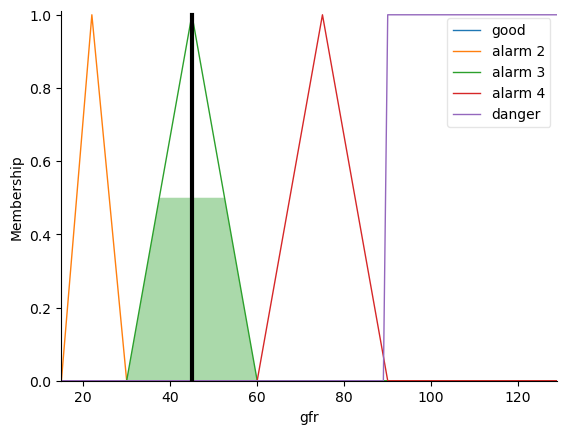

In [26]:
GfrFIS_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
#chương trình học Rule 1-8
GfrFIS = ctrl.ControlSystemSimulation(GfrFIS_ctrl)
#input
GfrFIS.input['glycaemia']=140
GfrFIS.input['cyclosporine']=4

GfrFIS.compute()
print(GfrFIS.output['gfr'])
gfr.view(sim=GfrFIS)